In [30]:
from tensorflow.examples.tutorials.mnist import input_data
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.contrib.layers import flatten
import random

import warnings

---
### Step0: Load the data

In [31]:
training_file = 'traffic-signs-data/train.p'
validation_file = 'traffic-signs-data/valid.p'
test_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
     train = pickle.load(f)
with open(validation_file, mode='rb') as f:
     valid = pickle.load(f)
with open(test_file, mode='rb') as f:
     test = pickle.load(f)
        
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

#### Observe the test data randomly
You can see the test data by pressing keys [ctl]+[enter].

---
### Step1: Dataset Summary & Exploration
The pickled data is a dictionary with 4 key/value pairs:
 - 'features' is a 4D array containing raw pixel data of the traffic sign images.
 - 'labels' is a 1D array containing the label/class id of the traffic sign. The file signnames.csv contains id -> name mappings for each id.
 - 'sizes' is a list containing tuples, (width,height) representing the original width and height the image.
 - 'coords' is a list containing tuples, (x1,y1,x2,y2) representing coordinates of a bounding box around the sign in the image.**These coordinates assume the original image. The pickled data contains resized versions(32x32) of these images.**

In [32]:
n_train = X_train.shape[0]
n_valid = X_valid.shape[0]
n_test = X_test.shape[0]
image_shape = X_train[0].shape
n_classes = pd.Series(y_train).nunique()

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Text(0.5, 1.0, '30383')

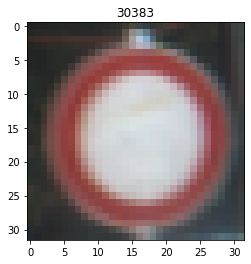

In [33]:
rand_idx = random.randint(0, X_train.shape[0])
plt.imshow(X_train[rand_idx])
plt.title(rand_idx)

In [34]:
path = 'signnames.csv'
sign_names = pd.read_csv(path)

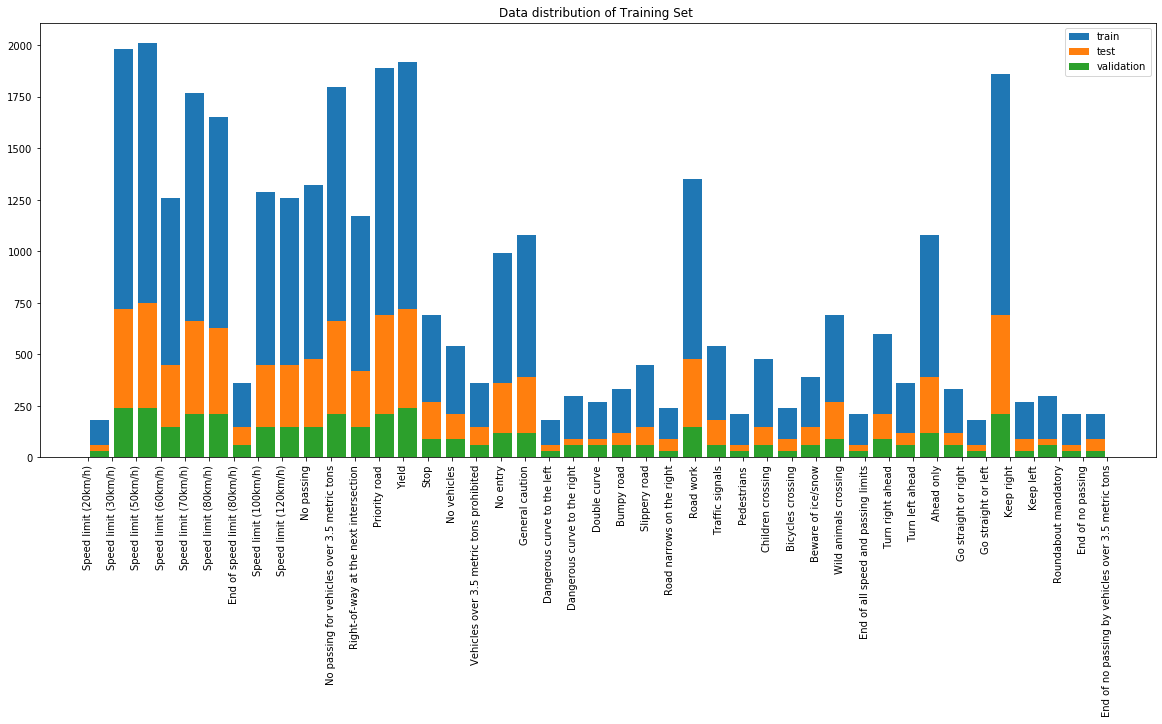

In [35]:
plt.figure(figsize=(20, 8))
plt.hist(y_train, bins=n_classes, rwidth=0.8, label='train')
plt.hist(y_test, bins=n_classes, rwidth=0.8, label='test')
plt.hist(y_valid, bins=n_classes, rwidth=0.8, label='validation')
plt.title('Data distribution of Training Set ')
plt.xticks(sign_names['ClassId'], sign_names['SignName'], rotation=90)
plt.legend()
plt.show()

---
### Step2: Design and Test a Model Architecture

In [36]:
# To ignore the warnings caused by tensorflow module
warnings.filterwarnings('ignore')

trainer = Trainer(OptimizerName.ADAM, 0.001)
model = LeNet5(image_shape[2], n_classes, trainer.optimizer)
saver = tf.train.Saver()

In [37]:
def evaluation(model, X_data, y_data):
    total_acc = 0
    for offset in range(0, len(X_data), BATCH_SIZE):
        end = offset + BATCH_SIZE
        X_batch = X_data[offset:end]
        y_batch = y_data[offset:end]
        acc = sess.run(
            model.evaluate,
            feed_dict={model.x: X_batch, model.y: y_batch})
        total_acc += acc * len(X_batch)
    return total_acc / len(X_data)

In [38]:
# To ignore the warnings caused by tensorflow module
warnings.filterwarnings('ignore')

EPOCH = 30
BATCH_SIZE = 128
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for e in range(EPOCH):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, n_train, BATCH_SIZE):
            end = offset + BATCH_SIZE
            X_batch = X_train[offset: end]
            y_batch = y_train[offset: end]
            sess.run(
                model.train,
                feed_dict={model.x: X_batch, model.y: y_batch})
        valid_accuracy = evaluation(model, X_valid, y_valid)    
        print("Epoch{} => Validation Accuracy: {:.3f}".format(e+1, valid_accuracy))
    saver.save(sess, './lenet')

Epoch1 => Validation Accuracy: 0.653
Epoch2 => Validation Accuracy: 0.790
Epoch3 => Validation Accuracy: 0.836
Epoch4 => Validation Accuracy: 0.851
Epoch5 => Validation Accuracy: 0.867
Epoch6 => Validation Accuracy: 0.880
Epoch7 => Validation Accuracy: 0.880
Epoch8 => Validation Accuracy: 0.867
Epoch9 => Validation Accuracy: 0.885
Epoch10 => Validation Accuracy: 0.887
Epoch11 => Validation Accuracy: 0.867
Epoch12 => Validation Accuracy: 0.890
Epoch13 => Validation Accuracy: 0.899
Epoch14 => Validation Accuracy: 0.892
Epoch15 => Validation Accuracy: 0.877
Epoch16 => Validation Accuracy: 0.910
Epoch17 => Validation Accuracy: 0.890
Epoch18 => Validation Accuracy: 0.895
Epoch19 => Validation Accuracy: 0.909
Epoch20 => Validation Accuracy: 0.905
Epoch21 => Validation Accuracy: 0.912
Epoch22 => Validation Accuracy: 0.915
Epoch23 => Validation Accuracy: 0.922
Epoch24 => Validation Accuracy: 0.902
Epoch25 => Validation Accuracy: 0.903
Epoch26 => Validation Accuracy: 0.887
Epoch27 => Validation

In [39]:
# To ignore the warnings caused by tensorflow module
warnings.filterwarnings('ignore')

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluation(model, X_valid, y_valid)    
    print("Test Accuracy: {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from .\lenet
Test Accuracy: 0.934


## Visualize the Neural Network's State

In [40]:
def output_feature_map(image_input, tf_activation, activation_min=-1, activation_max=-1, plt_num=1):
    activation = tf_activation.eval(session=sess, feed_dict={model.x: image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))

    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1)
        plt.title('FeatureMap ' + str(featuremap))
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

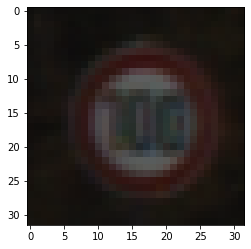

In [41]:
rand_idx = random.randint(0, X_train.shape[0])
plt.imshow(X_train[rand_idx])

In [42]:
sess = tf.InteractiveSession()
saver.restore(sess, tf.train.latest_checkpoint('.'))

INFO:tensorflow:Restoring parameters from .\lenet


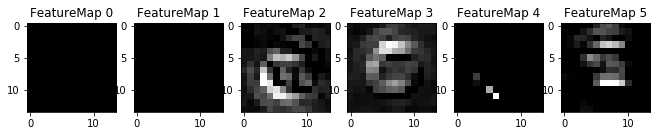

In [43]:
output_feature_map(X_train[rand_idx:rand_idx+1], model.conv1)

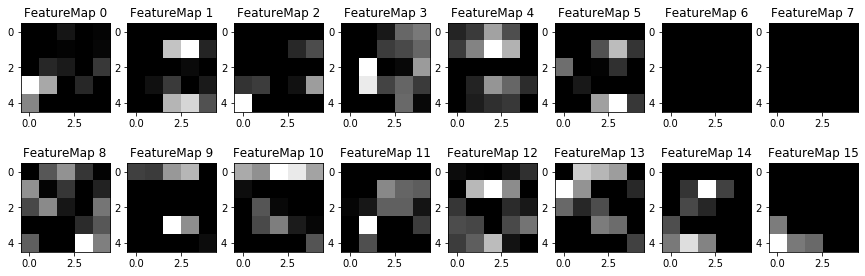

In [44]:
output_feature_map(X_train[rand_idx:rand_idx+1], model.conv2)

In [45]:
sess.close()